In [34]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf 
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

In [28]:
end = dt.datetime.now()
start = dt.datetime(2015,1,1)

yf.pdr_override()
df = pdr.get_data_yahoo('CBA.AX', start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,84.959686,85.277962,84.661308,85.277962,55.517937,949439
2015-01-05,85.238182,85.775269,85.049202,85.486832,55.653908,1351651
2015-01-06,84.641411,85.337639,84.412651,84.840332,55.233013,2477275
2015-01-07,84.850281,85.029312,84.094376,84.651360,55.110001,2127190
2015-01-08,85.079041,85.188446,84.671249,84.929848,55.291294,1997761


In [51]:
#df['MA50'] = df['Close'].rolling(window=50, min_periods=0).mean
df['MA200'] = df['Close'].rolling(window=50, min_periods=0).mean()
#df['MA50'].head(20)
df['MA200'].head()

Date
2015-01-02    85.277962
2015-01-05    85.382397
2015-01-06    85.201708
2015-01-07    85.064121
2015-01-08    85.037267
Name: MA200, dtype: float64

In [30]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('CBA', 'Volume'), row_width=[0.2,0.7])

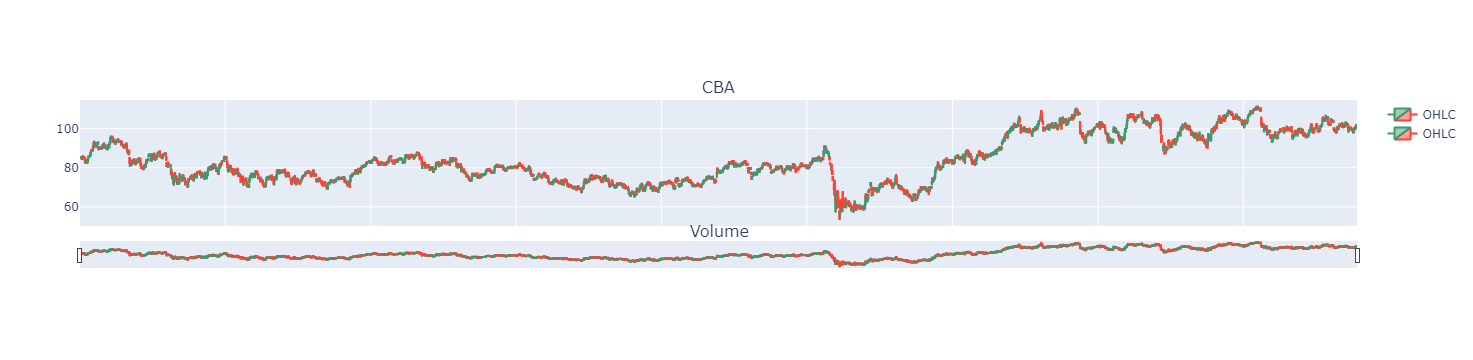

In [32]:
fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC'), row=1, col=1)

In [50]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='grey', name='MA200'), row=1, col=1)

TypeError: Object of type method is not JSON serializable

TypeError: Object of type method is not JSON serializable

TypeError: Object of type method is not JSON serializable

Figure({
    'data': [{'close': array([ 85.27796173,  85.48683167,  84.84033203, ..., 100.63999939,
                              101.59999847, 100.97000122]),
              'high': array([ 85.27796173,  85.77526855,  85.33763885, ..., 101.        ,
                             102.22000122, 101.23000336]),
              'low': array([ 84.66130829,  85.04920197,  84.41265106, ..., 100.31999969,
                            100.61000061, 100.51000214]),
              'name': 'OHLC',
              'open': array([ 84.95968628,  85.23818207,  84.64141083, ..., 100.88999939,
                             101.16999817, 100.59999847]),
              'type': 'candlestick',
              'x': array([datetime.datetime(2015, 1, 2, 0, 0),
                          datetime.datetime(2015, 1, 5, 0, 0),
                          datetime.datetime(2015, 1, 6, 0, 0), ...,
                          datetime.datetime(2023, 10, 11, 0, 0),
                          datetime.datetime(2023, 10, 12, 0, 0),
    